In [1]:
%matplotlib inline

from __future__ import print_function
from __future__ import division

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_features = pd.read_csv('./dengue_features_train.csv', index_col=[0,1,2])
train_labels = pd.read_csv('./dengue_labels_train.csv', index_col=[0,1,2])

In [3]:
train_features.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                           
sj   1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
          19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
          20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
          21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
          22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   1990 18                         12.42             297.572857   
          19                         22.82             298.211429   
          20                         34.54             298.781429   
          21                         15.36             298.987143   
          22                          7.52             299.518571   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   1990 18                     297.742857                   292.414286   
          19                     298.442857                   293.951429   
          20                     298.878571                   295.434286   
          21                     299.228571                   295.310000   
          22                     299.664286                   295.821429   

                      reanalysis_max_air_temp_k        ...          \
city year weekofyear                                   ...           
sj   1990 18                              299.8        ...           
          19                              300.9        ...           
          20                              300.5        ...           
          21                              301.4        ...           
          22                              301.9        ...           

                      reanalysis_precip_amt_kg_per_m2  \
city year weekofyear                                    
sj   1990 18                                    32.00   
          19                                    17.94   
          20                                    26.10   
          21                                    13.90   
          22                                    12.20   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   1990 18                                     73.365714   
          19                                     77.368571   
          20                                     82.052857   
          21                                     80.337143   
          22                                     80.460000   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   1990 18                                 12.42   
          19                                 22.82   
          20                                 34.54   
          21                                 15.36   
          22                                  7.52   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   1990 18                                      14.012857   
          19                                      15.372857   
          20                                      16.848571   
          21                                      16.672857   
          22                                      17.210000   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   1990 18                   2.628571           25.442857   
          19                   2.371429           26.714286   
          20                   2.300000     

In [4]:
sj_train_features = train_features.loc['sj']
sj_train_labels = train_labels.loc['sj']

iq_train_features = train_features.loc['iq']
iq_train_labels = train_labels.loc['iq']

print('San Juan')
print('features: ', sj_train_features.shape)
print('labels  : ', sj_train_labels.shape)

print('\nIquitos')
print('features: ', iq_train_features.shape)
print('labels  : ', iq_train_labels.shape)

# Remove `week_start_date` string.
sj_train_features.drop('week_start_date', axis=1, inplace=True)
iq_train_features.drop('week_start_date', axis=1, inplace=True)

San Juan
features:  (936, 21)
labels  :  (936, 1)

Iquitos
features:  (520, 21)
labels  :  (520, 1)


In [5]:
pd.isnull(sj_train_features).any()

ndvi_ne                                  True
ndvi_nw                                  True
ndvi_se                                  True
ndvi_sw                                  True
precipitation_amt_mm                     True
reanalysis_air_temp_k                    True
reanalysis_avg_temp_k                    True
reanalysis_dew_point_temp_k              True
reanalysis_max_air_temp_k                True
reanalysis_min_air_temp_k                True
reanalysis_precip_amt_kg_per_m2          True
reanalysis_relative_humidity_percent     True
reanalysis_sat_precip_amt_mm             True
reanalysis_specific_humidity_g_per_kg    True
reanalysis_tdtr_k                        True
station_avg_temp_c                       True
station_diur_temp_rng_c                  True
station_max_temp_c                       True
station_min_temp_c                       True
station_precip_mm                        True
dtype: bool

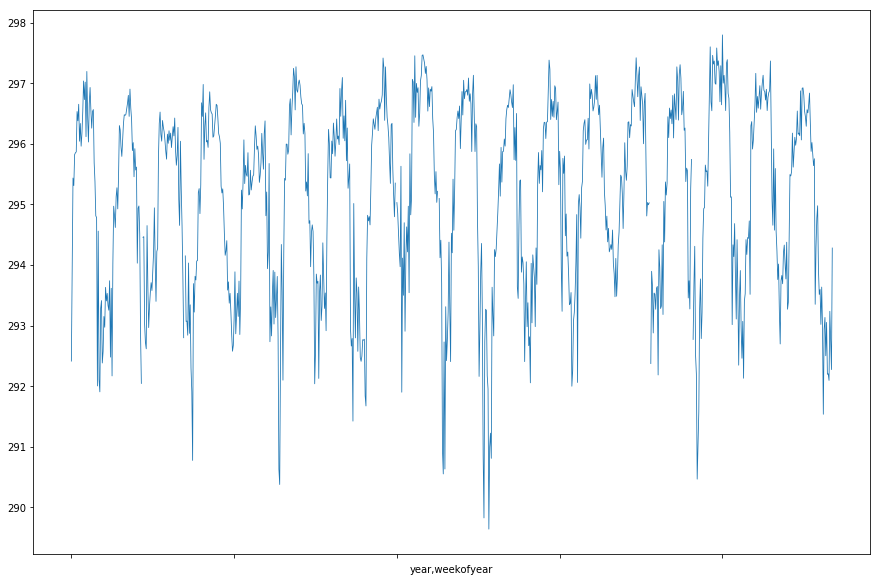

In [6]:
plt.figure(figsize=(15,10))
sj_train_features.reanalysis_dew_point_temp_k.plot.line(lw=0.8)

In [7]:
# sj_train_features.fillna(method='ffill', inplace=True)
# iq_train_features.fillna(method='ffill', inplace=True)

In [8]:
print('San Juan')
print('mean: ', sj_train_labels.mean()[0])
print('var :', sj_train_labels.var()[0])

print('\nIquitos')
print('mean: ', iq_train_labels.mean()[0])
print('var :', iq_train_labels.var()[0])

San Juan
mean:  34.18055555555556
var : 2640.045439691045

Iquitos
mean:  7.565384615384615
var : 115.8955239365642


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000290B0504470>]],
      dtype=object)

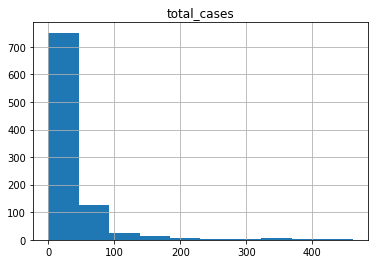

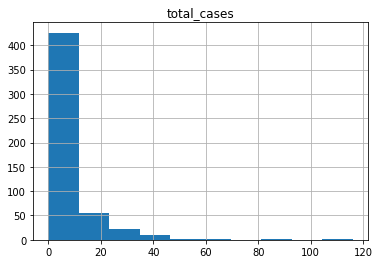

In [9]:
sj_train_labels.hist()
iq_train_labels.hist()

In [10]:
sj_train_features['total_cases'] = sj_train_labels.total_cases
iq_train_features['total_cases'] = iq_train_labels.total_cases

In [11]:
iq_train_features.head()

ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  precipitation_amt_mm  \
year weekofyear                                                                 
2000 26          0.192886  0.132257  0.340886  0.247200                 25.41   
     27          0.216833  0.276100  0.289457  0.241657                 60.61   
     28          0.176757  0.173129  0.204114  0.128014                 55.52   
     29          0.227729  0.145429  0.254200  0.200314                  5.60   
     30          0.328643  0.322129  0.254371  0.361043                 62.76   

                 reanalysis_air_temp_k  reanalysis_avg_temp_k  \
year weekofyear                                                 
2000 26                     296.740000             298.450000   
     27                     296.634286             298.428571   
     28                     296.415714             297.392857   
     29                     295.357143             296.228571   
     30                     296.432857             297.635714   

                 reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
year weekofyear                                                           
2000 26                           295.184286                      307.3   
     27                           295.358571                      306.6   
     28                           295.622857                      304.5   
     29                           292.797143                      303.6   
     30                           293.957143                      307.0   

                 reanalysis_min_air_temp_k     ...       \
year weekofyear                                ...        
2000 26                              293.1     ...        
     27                              291.1     ...        
     28                              292.6     ...        
     29                              288.6     ...        
     30                              291.5     ...        

                 reanalysis_relative_humidity_percent  \
year weekofyear                                         
2000 26                                     92.418571   
     27                                     93.581429   
     28                                     95.848571   
     29                                     87.234286   
     30                                     88.161429   

                 reanalysis_sat_precip_amt_mm  \
year weekofyear                                 
2000 26                                 25.41   
     27                                 60.61   
     28                                 55.52   
     29                                  5.60   
     30                                 62.76   

                 reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
year weekofyear                                                             
2000 26                                      16.651429           8.928571   
     27                                      16.862857          10.314286   
     28                                      17.120000           7.385714   
     29                                      14.431429           9.114286   
     30                                      15.444286           9.500000   

                 station_avg_temp_c  station_diur_temp_rng_c  \
year weekofyear                                                
2000 26                   26.400000                10.775000   
     27                   26.900000                11.566667   
     28                   26.800000                11.466667   
     29                   25.766667                10.533333   
     30                   26.600000                11.480000   

                 station_max_temp_c  station_min_temp_c  station_precip_mm  \
year weekofyear                                                              
2000 26                        32.5                20.7                3.0   
     27                        34.0                20.8               55.6   
     28  

In [12]:
sj_shift = sj_train_features.shift(1)
sj_shift = sj_shift.add_suffix('_SHIFT_1')

sj_train_features = pd.concat([sj_train_features, sj_shift], axis=1)

In [13]:
iq_shift = iq_train_features.shift(1)
iq_shift = iq_shift.add_suffix('_SHIFT_1')

iq_train_features = pd.concat([iq_train_features, iq_shift], axis=1)

In [14]:
sj_correlations = sj_train_features.corr()
iq_correlations = iq_train_features.corr()

Text(0.5,1,'San Juan Variable Correlations')

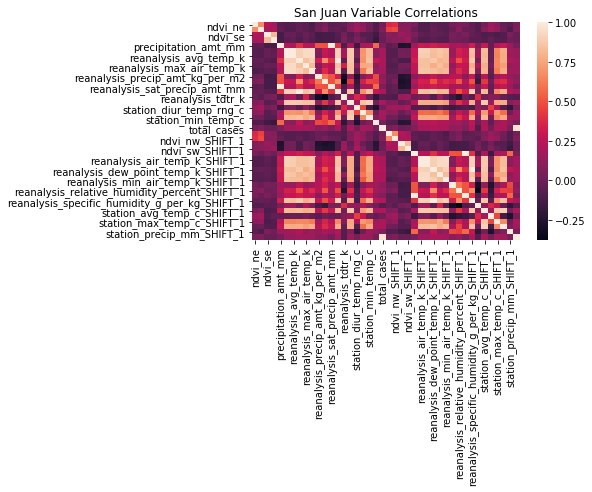

In [15]:
sj_corr_heat = sns.heatmap(sj_correlations)
plt.title('San Juan Variable Correlations')

Text(0.5,1,'Iquitos Variable Correlations')

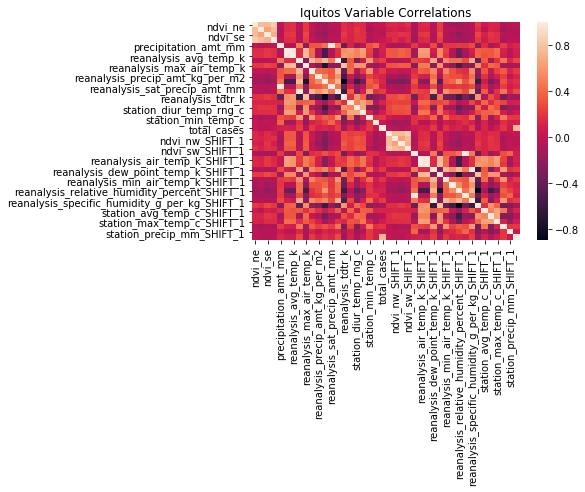

In [16]:
iq_corr_heat = sns.heatmap(iq_correlations)
plt.title('Iquitos Variable Correlations')

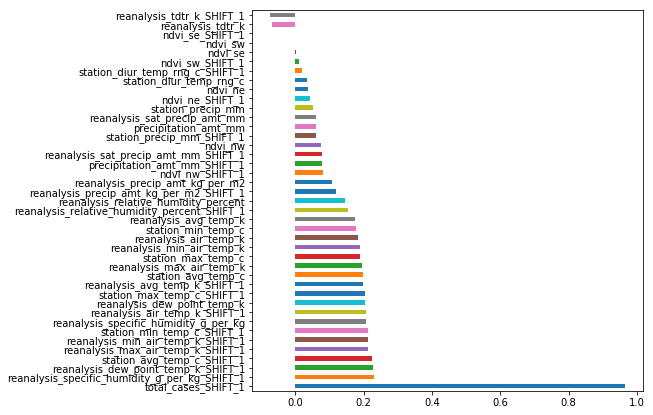

In [17]:
plt.figure(figsize=(7,7))
sj_correlations.total_cases.drop('total_cases').sort_values(ascending=False).plot.barh()

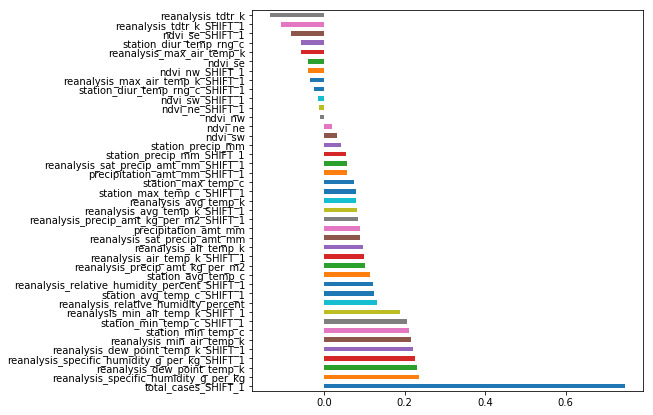

In [18]:
plt.figure(figsize=(7,7))
iq_correlations.total_cases.drop('total_cases').sort_values(ascending=False).plot.barh()

In [19]:
reanalysis_specific_humidity_g_per_kg
reanalysis_dew_point_temp_k
reanalysis_min_air_temp_k
reanalysis_min_air_temp_k

SHIFT _ 1
reanalysis_specific_humidity_g_per_kg
reanalysis_dew_point_temp_k
reanalysis_min_air_temp_k
station_min_temp_c

SyntaxError: invalid syntax (<ipython-input-19-c9dfb7e5317a>, line 6)

In [ ]:
def preprocess_data(data_path, labels_path=None):
    # load data and set index to city, year, weekofyear
    df = pd.read_csv(data_path, index_col=[0, 1, 2])
    
    # select features we want
    features = ['reanalysis_specific_humidity_g_per_kg', 
                 'reanalysis_dew_point_temp_k', 
                 'station_avg_temp_c', 
                 'station_min_temp_c']
    df = df[features]
    
    # fill missing values
    df.fillna(method='ffill', inplace=True)

    # add labels to dataframe
    if labels_path:
        labels = pd.read_csv(labels_path, index_col=[0, 1, 2])
        df = df.join(labels)
    
    # separate san juan and iquitos
    sj = df.loc['sj']
    iq = df.loc['iq']
    
    return sj, iq

In [ ]:
sj_train, iq_train = preprocess_data('./dengue_features_train.csv',
                                    labels_path="./dengue_labels_train.csv")

In [ ]:
sj_train_subtrain = sj_train.head(800)
sj_train_subtest = sj_train.tail(sj_train.shape[0] - 800)

iq_train_subtrain = iq_train.head(400)
iq_train_subtest = iq_train.tail(iq_train.shape[0] - 400)

In [ ]:
from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf

def get_best_model(train, test):
    # Step 1: specify the form of the model
    model_formula = "total_cases ~ 1 + " \
                    "reanalysis_specific_humidity_g_per_kg + " \
                    "reanalysis_dew_point_temp_k + " \
                    "station_min_temp_c + " \
                    "station_avg_temp_c"
    
    grid = 10 ** np.arange(-8, -3, dtype=np.float64)
                    
    best_alpha = []
    best_score = 1000
        
    # Step 2: Find the best hyper parameter, alpha
    for alpha in grid:
        model = smf.glm(formula=model_formula,
                        data=train,
                        family=sm.families.NegativeBinomial(alpha=alpha))

        results = model.fit()
        predictions = results.predict(test).astype(int)
        score = eval_measures.meanabs(predictions, test.total_cases)

        if score < best_score:
            best_alpha = alpha
            best_score = score

    print('best alpha = ', best_alpha)
    print('best score = ', best_score)
            
    # Step 3: refit on entire dataset
    full_dataset = pd.concat([train, test])
    model = smf.glm(formula=model_formula,
                    data=full_dataset,
                    family=sm.families.NegativeBinomial(alpha=best_alpha))

    fitted_model = model.fit()
    return fitted_model
    
sj_best_model = get_best_model(sj_train_subtrain, sj_train_subtest)
iq_best_model = get_best_model(iq_train_subtrain, iq_train_subtest)

In [ ]:
figs, axes = plt.subplots(nrows=2, ncols=1)

# plot sj
sj_train['fitted'] = sj_best_model.fittedvalues
sj_train.fitted.plot(ax=axes[0], label="Predictions")
sj_train.total_cases.plot(ax=axes[0], label="Actual")

# plot iq
iq_train['fitted'] = iq_best_model.fittedvalues
iq_train.fitted.plot(ax=axes[1], label="Predictions")
iq_train.total_cases.plot(ax=axes[1], label="Actual")

plt.suptitle("Dengue Predicted Cases vs. Actual Cases")
plt.legend()

In [ ]:
sj_test, iq_test = preprocess_data('./dengue_features_test.csv')

sj_predictions = sj_best_model.predict(sj_test).astype(int)
iq_predictions = iq_best_model.predict(iq_test).astype(int)

submission = pd.read_csv("./submission_format.csv",
                         index_col=[0, 1, 2])

submission.total_cases = np.concatenate([sj_predictions, iq_predictions])
submission.to_csv("./benchmark.csv")

In [ ]:
mean_squared_error(iq_train['total_cases'], iq_train['fitted'])**0.5

In [ ]:
mean_squared_error(sj_train['total_cases'], sj_train['fitted'])**0.5

In [ ]:
sj_train_labels.total_cases.plot.line(lw=0.8)

plt.title('Vegetation Index over Time')
plt.xlabel('Time')

In [160]:
x_features = ['reanalysis_specific_humidity_g_per_kg', 
                 'reanalysis_dew_point_temp_k',
                 'reanalysis_min_air_temp_k',
                 'station_min_temp_c']
x_features += [s + '_SHIFT_1' for s in x_features]

In [163]:
x_features = ['reanalysis_specific_humidity_g_per_kg', 
                 'reanalysis_dew_point_temp_k',
                 'reanalysis_min_air_temp_k',
                 'station_min_temp_c']
y_features = ['total_cases']

In [165]:
x_features+y_features

['reanalysis_specific_humidity_g_per_kg',
 'reanalysis_dew_point_temp_k',
 'reanalysis_min_air_temp_k',
 'station_min_temp_c',
 'total_cases']

In [4]:
train_labels = pd.read_csv('./dengue_features_test.csv', index_col=[0,1,2])

In [5]:
train_labels.shape

(416, 21)

In [6]:
new = train_labels.dropna(inplace=False)

In [8]:
new.head()

week_start_date  ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                          
sj   2008 18              2008-04-29  -0.0189 -0.018900  0.102729  0.091200   
          19              2008-05-06  -0.0180 -0.012400  0.082043  0.072314   
          22              2008-05-27   0.0568  0.039833  0.062267  0.075914   
          23              2008-06-03  -0.0440 -0.030467  0.132000  0.083529   
          24              2008-06-10  -0.0443 -0.024925  0.132271  0.159157   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   2008 18                         78.60             298.492857   
          19                         12.56             298.475714   
          22                          0.76             299.780000   
          23                         71.17             299.768571   
          24                         48.99             300.062857   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   2008 18                     298.550000                   294.527143   
          19                     298.557143                   294.395714   
          22                     299.671429                   294.760000   
          23                     299.728571                   295.314286   
          24                     300.007143                   295.650000   

                      reanalysis_max_air_temp_k        ...          \
city year weekofyear                                   ...           
sj   2008 18                              301.1        ...           
          19                              300.8        ...           
          22                              302.3        ...           
          23                              301.9        ...           
          24                              302.4        ...           

                      reanalysis_precip_amt_kg_per_m2  \
city year weekofyear                                    
sj   2008 18                                    25.37   
          19                                    21.83   
          22                                     4.36   
          23                                    22.55   
          24                                    13.10   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   2008 18                                     78.781429   
          19                                     78.230000   
          22                                     74.084286   
          23                                     76.557143   
          24                                     76.844286   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   2008 18                                 78.60   
          19                                 12.56   
          22                                  0.76   
          23                                 71.17   
          24                                 48.99   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   2008 18                                      15.918571   
          19                                      15.791429   
          22                                      16.137143   
          23                                      16.667143   
          24                                      17.010000   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   2008 18                   3.128571           26.528571   
          19                   2.571429           26.071429   
          22                   3.542857           2